# Top repositories for GitHub topics

<p>Nous allons effectuer ici le scraping de GitHub</p>
<ul>
    <li>Nous prendrons dans un premier temps le titre, l'url et la description des différents sujets en vedette</li>
    <li>Puis en nous servant de l'URL de ces différents sujets, nous prendrons les informations relatives aux dépôts présents dans le dit-sujet (le nom du dépôts, le nom du propriétaire, le nombre d'étoiles, et l'URL du dépôt)</li>
    <li>Nous consignerons enfin ces différents dépôts dans un fichier csv en suivant ce format:
        reponame,username,repoUrl,stars<br/>
        bypass-paywalls-chrome,iamadamdev,https://github.com/iamadamdev/bypass-paywalls-chrome,27100</li>
</ul>

### Nous commençons d'abord par utiliser le module requests de python pour récupérer le contenu de la page et ensuite extraire les informations avec BeautifulSoup.

In [4]:
import requests
topics_url = "https://github.com/topics"
data = requests.get(topics_url).content

In [4]:
with open("webpage.html", "wb") as f:
    f.write(data)

In [5]:
from bs4 import BeautifulSoup
doc = BeautifulSoup(data, "html.parser")

In [9]:
doc.prettify

<bound method Tag.prettify of 
<!DOCTYPE html>

<html data-a11y-animated-images="system" data-color-mode="auto" data-dark-theme="dark" data-light-theme="light" lang="en">
<head>
<meta charset="utf-8"/>
<link href="https://github.githubassets.com" rel="dns-prefetch"/>
<link href="https://avatars.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
<link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
<link crossorigin="" href="https://github.githubassets.com" rel="preconnect"/>
<link href="https://avatars.githubusercontent.com" rel="preconnect"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/light-92c7d381038e.css" integrity="sha512-ksfTgQOOnE+FFXf+yNfVjKSlEckJAdufFIYGK7ZjRhWcZgzAGcmZqqArTgMLpu90FwthqcCX4ldDgKXbmVMeuQ==" media="all" rel="stylesheet"><link crossorigin="anonymous" href="https://github.githubassets.com/assets/dark-d4a90c367f0c.css" integrity="sha512-1KkMNn8M/a

### Ensuite, une fois les données de notre page présentes dans notre variable <code>data</code>, nous allons inspecter le code html de notre page afin de repérer les classes où les informations dont nous avons besoin se trouvent.

In [6]:
title_selector = "f3 lh-condensed mb-0 mt-1 Link--primary"
titles = doc.find_all("p", class_= title_selector)
len(titles)    

30

In [7]:
description_selector = "f5 color-fg-muted mb-0 mt-1"
descriptions = doc.find_all("p", class_= description_selector)
len(descriptions)

30

In [8]:
link_selector = "no-underline flex-1 d-flex flex-column"
links = doc.find_all(href=True, class_= link_selector)
len(links)

30

In [9]:
topic_titles=[]
for tag in titles:
    topic_titles.append(tag.text)
topic_titles

['3D',
 'Ajax',
 'Algorithm',
 'Amp',
 'Android',
 'Angular',
 'Ansible',
 'API',
 'Arduino',
 'ASP.NET',
 'Atom',
 'Awesome Lists',
 'Amazon Web Services',
 'Azure',
 'Babel',
 'Bash',
 'Bitcoin',
 'Bootstrap',
 'Bot',
 'C',
 'Chrome',
 'Chrome extension',
 'Command line interface',
 'Clojure',
 'Code quality',
 'Code review',
 'Compiler',
 'Continuous integration',
 'COVID-19',
 'C++']

In [10]:
topic_links=[]
for tag in links:
    topic_links.append("https://github.com"+ tag["href"])
topic_links

['https://github.com/topics/3d',
 'https://github.com/topics/ajax',
 'https://github.com/topics/algorithm',
 'https://github.com/topics/amphp',
 'https://github.com/topics/android',
 'https://github.com/topics/angular',
 'https://github.com/topics/ansible',
 'https://github.com/topics/api',
 'https://github.com/topics/arduino',
 'https://github.com/topics/aspnet',
 'https://github.com/topics/atom',
 'https://github.com/topics/awesome',
 'https://github.com/topics/aws',
 'https://github.com/topics/azure',
 'https://github.com/topics/babel',
 'https://github.com/topics/bash',
 'https://github.com/topics/bitcoin',
 'https://github.com/topics/bootstrap',
 'https://github.com/topics/bot',
 'https://github.com/topics/c',
 'https://github.com/topics/chrome',
 'https://github.com/topics/chrome-extension',
 'https://github.com/topics/cli',
 'https://github.com/topics/clojure',
 'https://github.com/topics/code-quality',
 'https://github.com/topics/code-review',
 'https://github.com/topics/compil

In [11]:
topic_desc=[]
for tag in descriptions:
    topic_desc.append(tag.text.strip())
topic_desc

['3D modeling is the process of virtually developing the surface and structure of a 3D object.',
 'Ajax is a technique for creating interactive web applications.',
 'Algorithms are self-contained sequences that carry out a variety of tasks.',
 'Amp is a non-blocking concurrency library for PHP.',
 'Android is an operating system built by Google designed for mobile devices.',
 'Angular is an open source web application platform.',
 'Ansible is a simple and powerful automation engine.',
 'An API (Application Programming Interface) is a collection of protocols and subroutines for building software.',
 'Arduino is an open source hardware and software company and maker community.',
 'ASP.NET is a web framework for building modern web apps and services.',
 'Atom is a open source text editor built with web technologies.',
 'An awesome list is a list of awesome things curated by the community.',
 'Amazon Web Services provides on-demand cloud computing platforms on a subscription basis.',
 'Azu

### Une fois que cela est fait, nous consignons le tout dans un dataframe.

In [12]:
topics={"titles":topic_titles,"desc":topic_desc, "links":topic_links}

In [13]:
import pandas as pd
df = pd.DataFrame(topics)
df

,titles,desc,links
0,3D,3D modeling is the process of virtually develo...,https://github.com/topics/3d
1,Ajax,Ajax is a technique for creating interactive w...,https://github.com/topics/ajax
2,Algorithm,Algorithms are self-contained sequences that c...,https://github.com/topics/algorithm
3,Amp,Amp is a non-blocking concurrency library for ...,https://github.com/topics/amphp
4,Android,Android is an operating system built by Google...,https://github.com/topics/android
5,Angular,Angular is an open source web application plat...,https://github.com/topics/angular
6,Ansible,Ansible is a simple and powerful automation en...,https://github.com/topics/ansible
7,API,An API (Application Programming Interface) is ...,https://github.com/topics/api
8,Arduino,Arduino is an open source hardware and softwar...,https://github.com/topics/arduino
9,ASP.NET,ASP.NET is a web framework for building modern...,https://github.com/topics/aspnet


### Nous pouvons maintenant commencer l'extraction des différentes informations des dépôts de chaque sujet.

In [14]:
#test : inspection de la page du premier sujet (3D)
data_topic = requests.get(topic_links[0]).content
topic_soup=BeautifulSoup(data_topic, "html.parser")
topic_soup.prettify

<bound method Tag.prettify of 
<!DOCTYPE html>

<html data-a11y-animated-images="system" data-color-mode="auto" data-dark-theme="dark" data-light-theme="light" lang="en">
<head>
<meta charset="utf-8"/>
<link href="https://github.githubassets.com" rel="dns-prefetch"/>
<link href="https://avatars.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
<link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
<link crossorigin="" href="https://github.githubassets.com" rel="preconnect"/>
<link href="https://avatars.githubusercontent.com" rel="preconnect"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/light-92c7d381038e.css" integrity="sha512-ksfTgQOOnE+FFXf+yNfVjKSlEckJAdufFIYGK7ZjRhWcZgzAGcmZqqArTgMLpu90FwthqcCX4ldDgKXbmVMeuQ==" media="all" rel="stylesheet"><link crossorigin="anonymous" href="https://github.githubassets.com/assets/dark-d4a90c367f0c.css" integrity="sha512-1KkMNn8M/a

In [15]:
repo_selector = "f3 color-fg-muted text-normal lh-condensed"
repo_names = topic_soup.find_all("h3", class_=repo_selector)
repo_names[0].a

<a data-ga-click="Explore, go to repository owner, location:explore feed" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"OWNER","click_visual_representation":"REPOSITORY_OWNER_HEADING","actor_id":null,"record_id":97088,"originating_url":"https://github.com/topics/3d","user_id":null}}' data-hydro-click-hmac="4bdbc49d3c05ae7f70b531fbce709a384200b0768554e0172950286a8db30940" data-turbo="false" data-view-component="true" href="/mrdoob">
            mrdoob
</a>

In [16]:
selector = "f3 color-fg-muted text-normal lh-condensed" #repo and username selector
h3_tag = topic_soup.find_all("h3", class_=repo_selector) #user/repo
h3_tag

[<h3 class="f3 color-fg-muted text-normal lh-condensed">
 <a data-ga-click="Explore, go to repository owner, location:explore feed" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"OWNER","click_visual_representation":"REPOSITORY_OWNER_HEADING","actor_id":null,"record_id":97088,"originating_url":"https://github.com/topics/3d","user_id":null}}' data-hydro-click-hmac="4bdbc49d3c05ae7f70b531fbce709a384200b0768554e0172950286a8db30940" data-turbo="false" data-view-component="true" href="/mrdoob">
             mrdoob
 </a>          /
           <a class="text-bold wb-break-word" data-ga-click="Explore, go to repository, location:explore feed" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"REPOSITORY","click_visual_representation":"REPOSITORY_NAME_HEADING","actor_id":null,"record_id":576201,"originating_url":"https://github.com/topics/3d","user_id":null}}' data-hydro-click

In [17]:
stars_selector = "Counter js-social-count"
stars_list = topic_soup.find_all("span", class_ = stars_selector)
stars_list[5].text

'13.9k'

In [18]:
<span id="repo-stars-counter-star" aria-label="83017 users starred this repository" data-singular-suffix="user starred this repository" data-plural-suffix="users starred this repository" data-pjax-replace="true" data-turbo-replace="true" title="83,017" data-view-component="true" class="">83k</span>

SyntaxError: invalid syntax (<ipython-input-18-d8b27bf3823b>, line 1)

In [22]:
#Formattage des étoiles qui sont sous la forme XX.X k (float k), k = 1000
def stars_formatter(star_tag_text):
    return int(float(star_tag_text[:-1])*1000)

In [38]:
#test
stars_formatter(stars_list[5].text)

13900

In [44]:
#fonction permettant l'extraction des données des différents dépôts
def repo_info(h3_tag, star_tag):
    a_tags = h3_tag.find_all("a")
    repo_name = a_tags[1].text.strip()
    user_name = a_tags[0].text.strip()
    repo_url = "https://github.com/"+user_name+"/"+repo_name
    stars = stars_formatter(star_tag.text)
    return repo_name, user_name, repo_url,stars

In [24]:
repo_info(h3_tag[0],stars_list[0])

('three.js', 'mrdoob', 'https://github.com/mrdoob/three.js', 83000)

In [43]:
#Insertion des données dans un dataframe

In [25]:
repo_dict = {"reponame":[], "username":[],  "repoUrl":[], "stars":[]}
for i, tag in enumerate(h3_tag):
    for j, key in enumerate(repo_dict.keys()):
        repo_dict[key].append(repo_info(tag, stars_list[i])[j])
repo_dict

{'reponame': ['three.js',
  'libgdx',
  'react-three-fiber',
  'Babylon.js',
  'aframe',
  'tinyrenderer',
  '3d-game-shaders-for-beginners',
  'FreeCAD',
  'zdog',
  'cesium',
  '3D-Machine-Learning',
  'SpaceshipGenerator',
  'Open3D',
  'blender',
  'BlenderGIS',
  'spritejs',
  'openscad',
  'webglstudio.js',
  'tensorspace',
  'PRNet',
  'model-viewer',
  'vrn',
  'tinyraytracer',
  'Fyrox',
  'magnum',
  'vanta',
  'webgl-fundamentals',
  '3DDFA',
  'isometric-contributions',
  'meshlab'],
 'username': ['mrdoob',
  'libgdx',
  'pmndrs',
  'BabylonJS',
  'aframevr',
  'ssloy',
  'lettier',
  'FreeCAD',
  'metafizzy',
  'CesiumGS',
  'timzhang642',
  'a1studmuffin',
  'isl-org',
  'blender',
  'domlysz',
  'spritejs',
  'openscad',
  'jagenjo',
  'tensorspace-team',
  'YadiraF',
  'google',
  'AaronJackson',
  'ssloy',
  'FyroxEngine',
  'mosra',
  'tengbao',
  'gfxfundamentals',
  'cleardusk',
  'jasonlong',
  'cnr-isti-vclab'],
 'repoUrl': ['https://github.com/mrdoob/three.js',
 

In [26]:
repo_df = pd.DataFrame(repo_dict)

In [27]:
repo_df

,reponame,username,repoUrl,stars
0,three.js,mrdoob,https://github.com/mrdoob/three.js,83000
1,libgdx,libgdx,https://github.com/libgdx/libgdx,20100
2,react-three-fiber,pmndrs,https://github.com/pmndrs/react-three-fiber,18500
3,Babylon.js,BabylonJS,https://github.com/BabylonJS/Babylon.js,17600
4,aframe,aframevr,https://github.com/aframevr/aframe,14300
5,tinyrenderer,ssloy,https://github.com/ssloy/tinyrenderer,13900
6,3d-game-shaders-for-beginners,lettier,https://github.com/lettier/3d-game-shaders-for...,13200
7,FreeCAD,FreeCAD,https://github.com/FreeCAD/FreeCAD,11600
8,zdog,metafizzy,https://github.com/metafizzy/zdog,9200
9,cesium,CesiumGS,https://github.com/CesiumGS/cesium,8800


## Finalement, pour simplifier la tâche, nous allons regrouper nos différentes instructions dans des fonctions. Nous devons dans cette partie:
1. Récupérer la liste des sujets vedettes
2. Récupérer la liste des meilleurs dépôts d'un sujet vedette choisi
3. Pour chaque sujet, mettre les différents répos récupérés dans un fichier csv

In [44]:
import requests
import pandas as pd

from bs4 import BeautifulSoup
#fonctions permettant de récupérer la liste des sujets vedettes

def get_topics_titles(doc):
    title_selector = "f3 lh-condensed mb-0 mt-1 Link--primary"
    titles = doc.find_all("p", class_= title_selector)
    topic_titles=[]
    for tag in titles:
        topic_titles.append(tag.text.strip())
    return topic_titles

def get_topics_desc(doc):
    description_selector = "f5 color-fg-muted mb-0 mt-1"
    descriptions = doc.find_all("p", class_= description_selector)
    topic_desc=[]
    for tag in descriptions:
        topic_desc.append(tag.text.strip())
    return topic_desc


def get_topics_links(doc):
    link_selector = "no-underline flex-1 d-flex flex-column"
    links = doc.find_all(href=True, class_= link_selector)
    topic_links=[]
    for tag in links:
        topic_links.append("https://github.com"+ tag["href"])
    return topic_links

def get_topic_page(url):
    topic_url = requests.get(url)
    if(topic_url.status_code!=200):
        raise Exception('Erreur de chargement de la page {}'.format(topic_url))
        
    data = topic_url.content
    topic_soup=BeautifulSoup(data, "html.parser")
    return topic_soup


def get_topics():
    doc = get_topic_page("https://github.com/topics")
    titles = get_topics_titles(doc)
    links = get_topics_links(doc)
    desc = get_topics_desc(doc)
    
    topic_dict = {"title":titles,"link":links, "desc":desc}
    return pd.DataFrame(topic_dict)

In [45]:
get_topics()['link'][0]

'https://github.com/topics/3d'

In [47]:
#Récupération des infos d'un dépôt (repositories) d'un sujet bien précis
def stars_formatter(star_tag_text):
    return int(float(star_tag_text[:-1])*1000)

def repo_info(h3_tag, star_tag):
    a_tags = h3_tag.find_all("a")
    repo_name = a_tags[1].text.strip()
    user_name = a_tags[0].text.strip()
    repo_url = "https://github.com/"+user_name+"/"+repo_name
    stars = stars_formatter(star_tag.text)
    return repo_name, user_name, repo_url,stars


def get_topic_repos(url):
    topic_soup = get_topic_page(url)
    
    repo_selector = "f3 color-fg-muted text-normal lh-condensed" #repo and username selector
    h3_tag = topic_soup.find_all("h3", class_=repo_selector) #user/repo
    
    stars_selector = "Counter js-social-count"
    stars_tags = topic_soup.find_all("span", class_ = stars_selector)
    
    repo_dict = {"reponame":[], "username":[],  "repoUrl":[], "stars":[]}
    
    for i, h3_tag in enumerate(h3_tag):
        for j, key in enumerate(repo_dict.keys()):
          repo_dict[key].append(repo_info(h3_tag, stars_tags[i])[j])
    
    return pd.DataFrame(repo_dict)


In [48]:
import os
#fonctions permettant de créer les fichiers csv des différents sujets
def scrape_topic(topic_link, path):
    if os.path.exists(path):
        print('Le fichier {} existe déjà...'.format(path))
        return
    topic_df = get_topic_repos(topic_link)
    topic_df.to_csv(path, index = None)


def scrape_topics_repo():
    print("Scraping de la liste des topics en cours...")
    topics_df = get_topics()
    
    os.makedirs('data', exist_ok=True)
    print("ok")
    for i, row in topics_df.iterrows():
        print('Scrapping des meilleurs repos du topic "{}"'.format(row['title']))
        scrape_topic(row['link'], 'data/{}.csv'.format(row['title']))


In [42]:
scrape_topics_repo()

Scraping de la liste des topics en cours...
ok
Scrapping des meilleurs repos du topic "3D"
Le fichier data/3D.csv existe déjà...
Scrapping des meilleurs repos du topic "Ajax"
Le fichier data/Ajax.csv existe déjà...
Scrapping des meilleurs repos du topic "Algorithm"
Le fichier data/Algorithm.csv existe déjà...
Scrapping des meilleurs repos du topic "Amp"
Le fichier data/Amp.csv existe déjà...
Scrapping des meilleurs repos du topic "Android"
Le fichier data/Android.csv existe déjà...
Scrapping des meilleurs repos du topic "Angular"
Le fichier data/Angular.csv existe déjà...
Scrapping des meilleurs repos du topic "Ansible"
Le fichier data/Ansible.csv existe déjà...
Scrapping des meilleurs repos du topic "API"
Le fichier data/API.csv existe déjà...
Scrapping des meilleurs repos du topic "Arduino"
Le fichier data/Arduino.csv existe déjà...
Scrapping des meilleurs repos du topic "ASP.NET"
Le fichier data/ASP.NET.csv existe déjà...
Scrapping des meilleurs repos du topic "Atom"
Le fichier data

### Nous obtenons le résultat suivant:

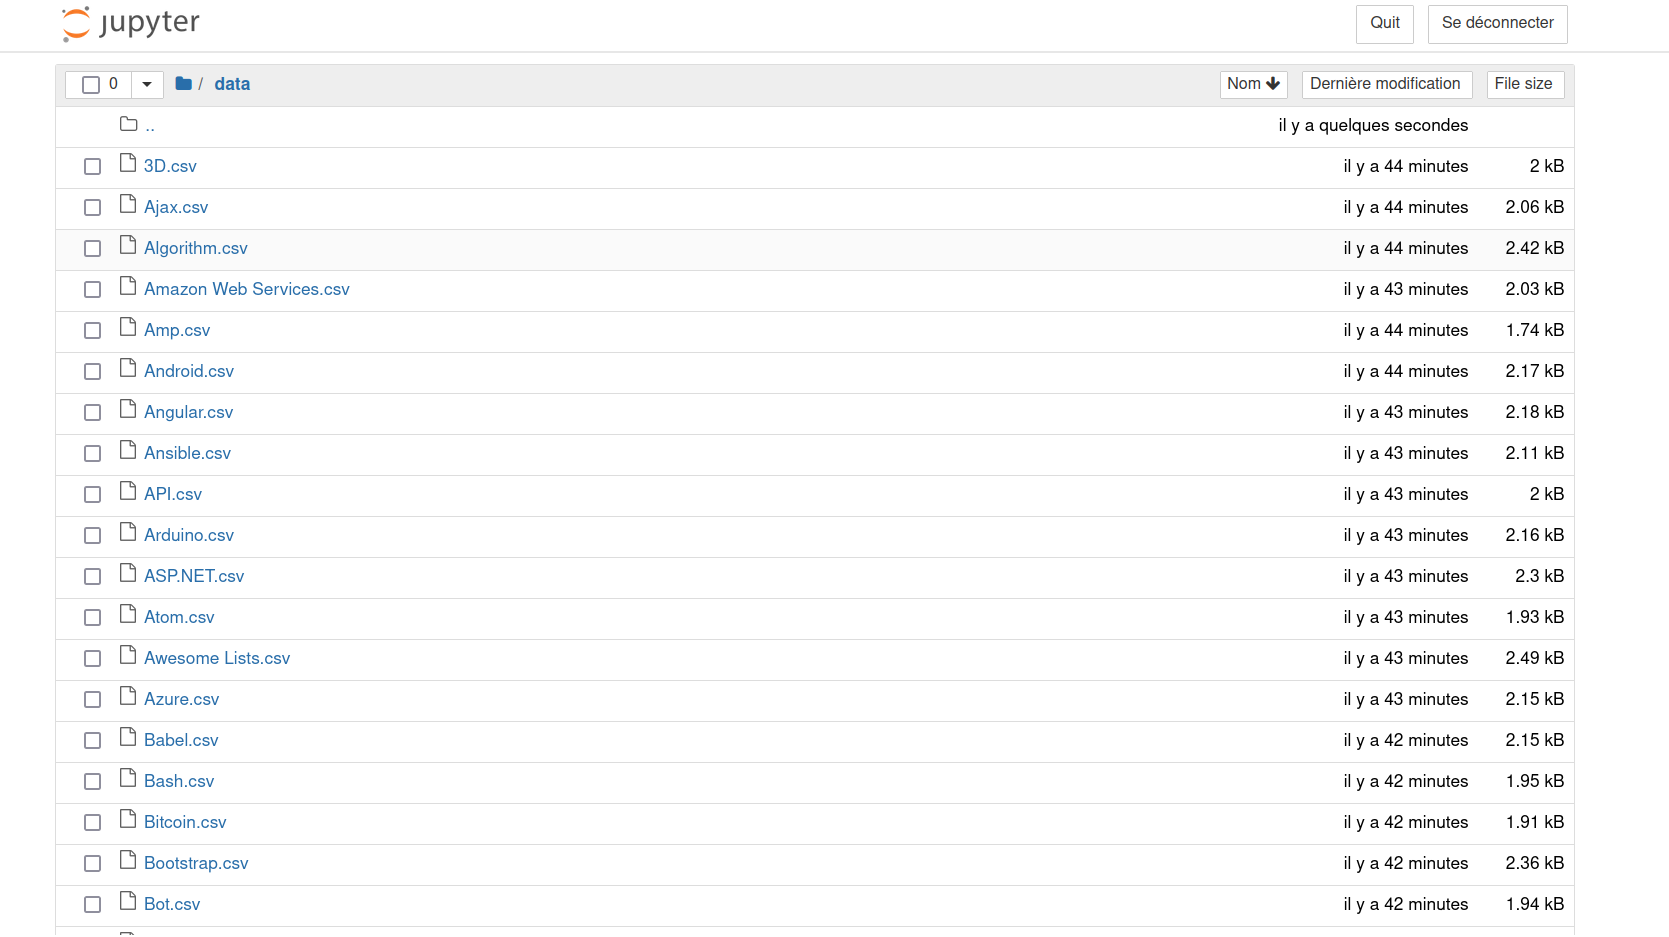

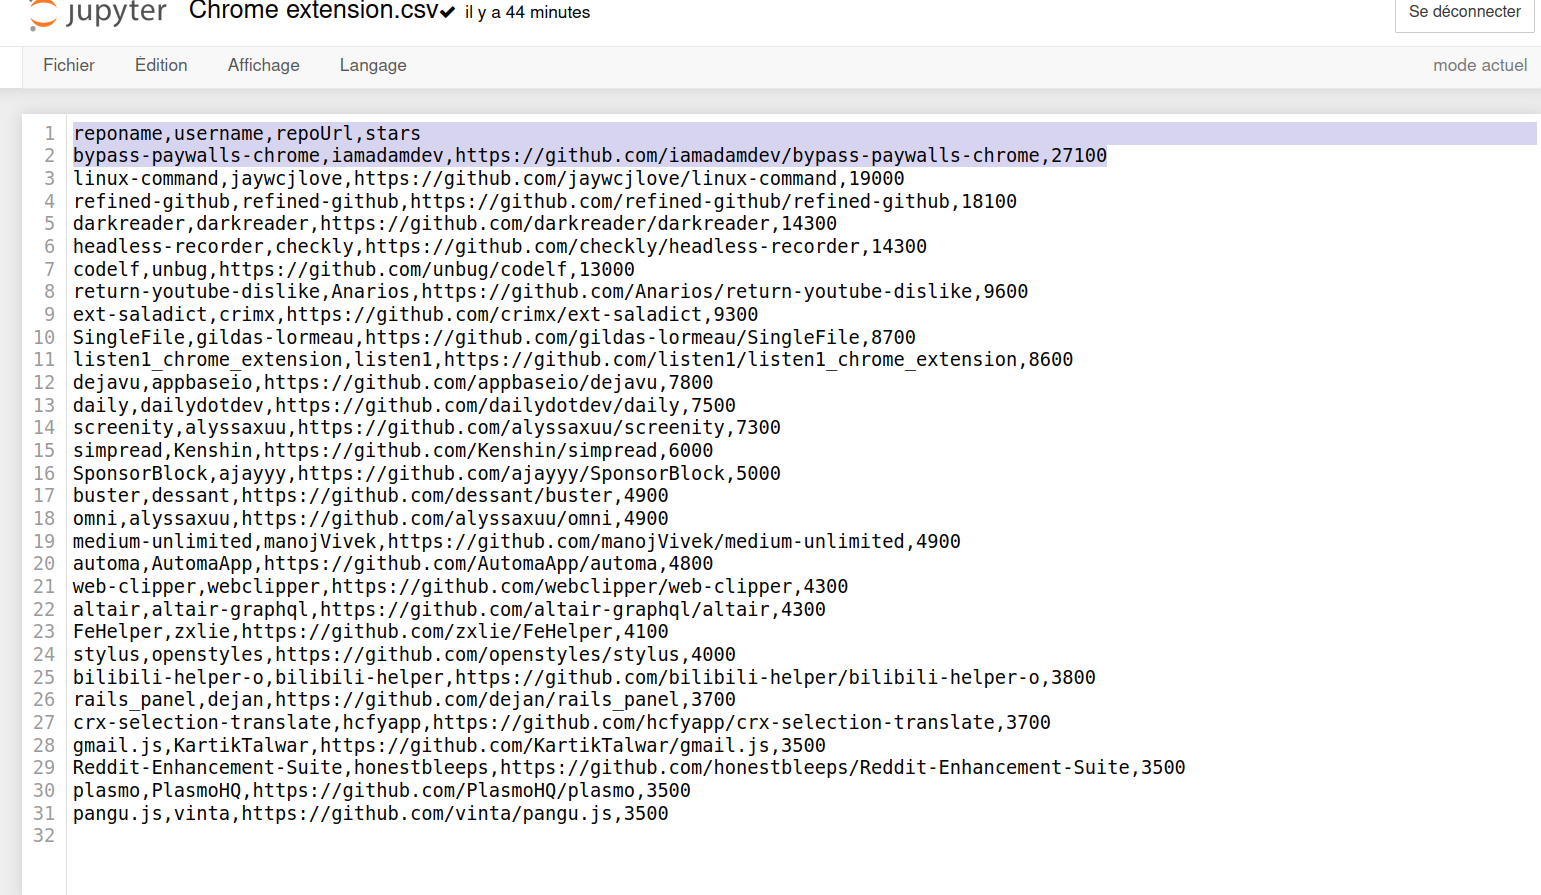